In [1]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, precision_recall_curve, auc, f1_score, recall_score, precision_score, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class ModelPerformance:
    def __init__(self, task_type, model):
        self.task_type = task_type
        self.model = model
        self.X_train = globals().get('X_train')
        self.y_train = globals().get('y_train')
        self.X_test = globals().get('X_test')
        self.y_test = globals().get('y_test')


    def set_data(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

    @property
    def y_pred_train(self):
        return self.model.predict(self.X_train)
    
    @property
    def y_pred_test(self):
        return self.model.predict(self.X_test)

    # For now, just support binary classification
    def performance_dataframe(self, visualize = True):
        if self.X_train is None or self.y_train is None or self.X_test is None or self.y_test is None:
            raise ValueError("Specify the train and test data using set_data method")
        
        
        if self.task_type == 'r':
            train_performance = []
            test_performance = []

            train_performance.append(np.sqrt(mean_squared_error(self.y_train, self.y_pred_train)))
            test_performance.append(np.sqrt(mean_squared_error(self.y_test, self.y_pred_test)))

            train_performance.append(mean_absolute_error(self.y_train, self.y_pred_train))
            test_performance.append(mean_absolute_error(self.y_test, self.y_pred_test))

            train_performance.append(r2_score(self.y_train, self.y_pred_train))
            test_performance.append(r2_score(self.y_test, self.y_pred_test))

            df_performance = pd.DataFrame([train_performance,test_performance], columns=['Root_mean_squared_error', 'mean_absolute_error', 'r2_score'], index= ['trian','test'])
            display(df_performance)
            
            if visualize== True:
                fig ,ax = plt.subplots(1,2, figsize = (10,4))
                sns.scatterplot(x = self.y_train, y = self.y_pred_train, ax = ax[0])
                ax[0].set_xlabel("y_real")
                ax[0].set_ylabel("y_prediction")
                ax[0].set_title("Train")
                ax[0].plot([self.y_train.min(), self.y_train.max()], [self.y_train.min(), self.y_train.max()], 'r--')

                sns.scatterplot(x = self.y_test, y = self.y_pred_test, ax = ax[1])
                ax[1].set_xlabel("y_real")
                ax[1].set_ylabel("y_prediction")
                ax[1].set_title("Test")
                ax[1].plot([self.y_test.min(), self.y_test.max()], [self.y_test.min(), self.y_test.max()], 'r--')
                plt.show()

        if self.task_type=='c':
            train_performance = []
            test_performance = []
            metrics_list = [accuracy_score,precision_score, recall_score, f1_score ]
            for m in metrics_list:
                train_performance.append(m(self.y_train, self.y_pred_train))
                test_performance.append(m(self.y_test, self.y_pred_test))

            
            performance_df = pd.DataFrame([train_performance,test_performance], columns=['accuracy', 'precision', 'recall', 'f1'], index= ['trian','test'])
            display(performance_df)

            if visualize ==True:
                #confusion matrix:
                fig, ax = plt.subplots(1,2,figsize = (12,5))

                cm_train_display = ConfusionMatrixDisplay.from_estimator(self.model, self.X_train, self.y_train, ax= ax[0])
                ax[0].set_title("Confusion matrix of Train data")

                cm_test_display = ConfusionMatrixDisplay.from_estimator(self.model, self.X_test, self.y_test, ax = ax[1] )#display_labels = [False, True])
                ax[1].set_title("Confusion matrix of Test data")

                cm_train_display.confusion_matrix
                cm_test_display.confusion_matrix
                plt.show()
        
    
    #def auc_curve(self):
    #    if self.task_type == 'r':
    #        raise TypeError("For AUC curve, the task type has to be classification")
        


# Classification

In [2]:
import seaborn as sns

sns.get_dataset_names()

df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, precision_recall_curve, auc, f1_score, recall_score, precision_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
df['sex']= label_encoder.fit_transform(df['sex'])


y = df['survived']
X = df[['pclass', 'sex', 'fare','sibsp','parch']]

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LogisticRegression()
lr.fit(X_train, y_train)

accuracy_score(y_test, lr.predict(X_test))

0.8161434977578476

,accuracy,precision,recall,f1
trian,0.784431,0.752174,0.665385,0.706122
test,0.816143,0.773333,0.707317,0.738854


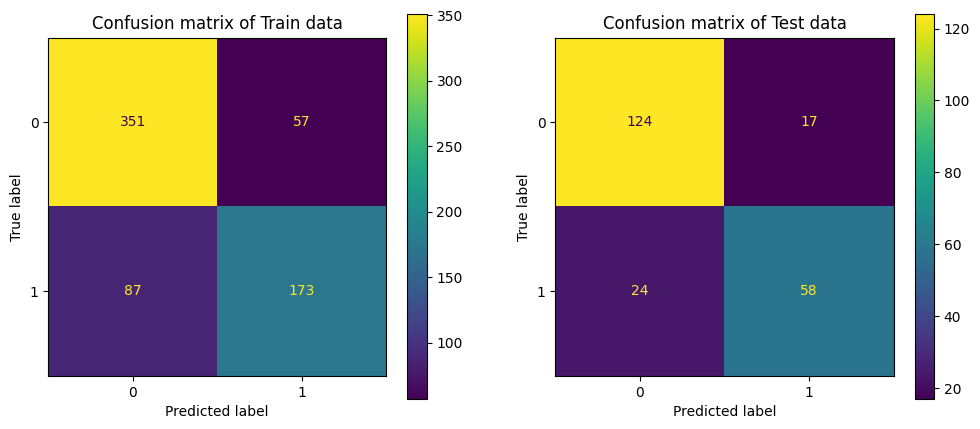

In [4]:
lr_performance = ModelPerformance( 'c', lr)

lr_performance.performance_dataframe()

# Regression

In [13]:
import seaborn as sns

df = sns.load_dataset('tips')

df


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])


y = df['tip']
X = df[['total_bill', 'sex', 'smoker']]

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression()

,Root_mean_squared_error,mean_absolute_error,r2_score
trian,1.041726,0.755383,0.459040
test,0.932972,0.707436,0.457786


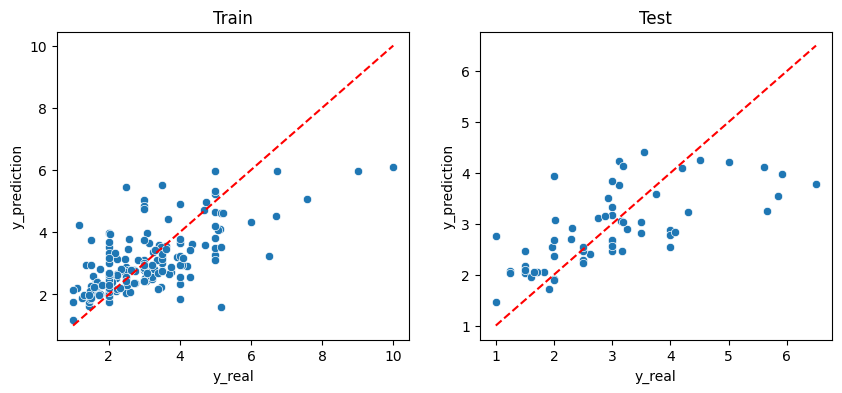

In [15]:
lr_per= ModelPerformance(task_type= 'r', model = lr)

lr_per.performance_dataframe()

# Check the X_train ,X_test, y_train and y_test data assignment

In [4]:
import seaborn as sns

df = sns.load_dataset('tips')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])


y = df['tip']
data = df[['total_bill', 'sex', 'smoker']]

data_train, data_test, y_train, y_test = train_test_split(data,y)

lr = LinearRegression()
lr.fit(data_train, y_train)

lr_per= ModelPerformance(task_type= 'r', model = lr)

print(lr_per.X_train)

lr_per.performance_dataframe()


NameError: name 'ModelPerformance' is not defined

,Root_mean_squared_error,mean_absolute_error,r2_score
trian,0.946181,0.697422,0.490774
test,1.219836,0.856464,0.343869


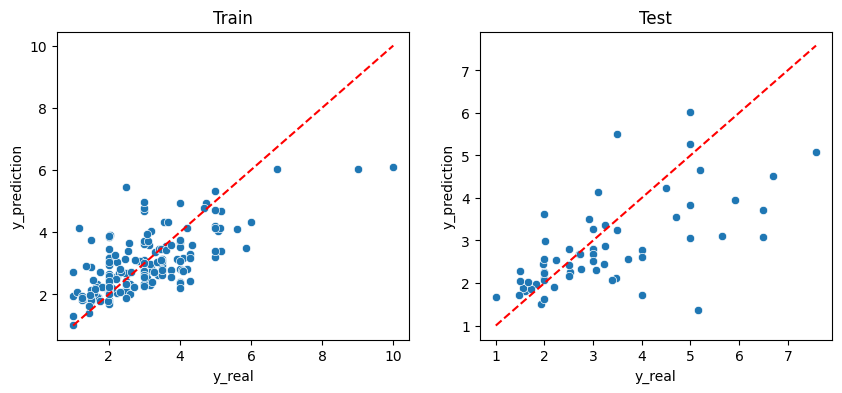

In [3]:
lr_per.set_data(X_train= data_train, y_train= y_train, X_test= data_test, y_test = y_test)


lr_per.performance_dataframe()